# HW_4 CLUSTERIZATION

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import io
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

In [ ]:
klumba = cv2.imread('Klumba.jpg')

In [ ]:
draw_picture(klumba, 'my pic',bgr=False)

### 1. Загрузите картинку и приведите ее к квадратной форме и размеру 128*128: 

In [ ]:
klumba_resized = # your code here
draw_picture(klumba_resized, 'my pic_resized',bgr=False)

### 2. Реализуйте три модели класстеризации: KMeans, DBSCAn, AgglomerativeClustering

#### 2a. KMeans

In [ ]:
# Load Image and transform to a 2D numpy array.
w, h, d = # your code here
assert d == 3

- Вытяните картинку в трехмерный вектор:

In [ ]:
X = # your code here
X.shape

- к вектору трех каналов примените модель KMeans с разным числом кластеров (2,5,10 и 20):

- дополнительно в цикле сохраняйте значения инерции класстеров, а также structure similarity index (ssim)

In [ ]:
n_colors = 64
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
k_inertia = []
k_img = []
K = [# your code here]
for ax, k in zip(axes,K):
    clf_kmeans = KMeans(n_clusters=k)
    w, h, d = # your code here
    # fit_predict
    clusters_kmeans = # your code here
    k_inertia.append(# your code here)
    w, h, d = original_shape = tuple(klumba.shape)
    ssim_const= # your code here
    ax.set_xlabel(f'SSIM: {ssim_const:.2f}')
    ax.imshow((recreate_image(clf_kmeans.cluster_centers_, clusters_kmeans, w, h)*255).astype(np.uint8))


- Визализируйте полученные кластеры при разном числе к:

In [ ]:
plt.plot(# your code here)

#### 2b DBSCAN

- Вытяните картинку в трехмерный вектор:

In [ ]:
w, h, d = # your code here
shuffled_klumba = # your code here

-  Примените DBSCAN к трехмерному вектору изображения

- дополнительно посчитайте structure similarity index (ssim)

In [ ]:
from sklearn.cluster import DBSCAN
DBSCAN = # your code here
# fit predict DBSCAN
labels = # your code here
new_klumba_of_dbscan = # your code here

klustering_image = (recreate_image(new_klumba_of_dbscan, labels, w, h)*255).astype(np.uint8)
ssim_const = # your code here



- Визализируйте полученные кластеры при после прменнеия DBSCAN:

In [ ]:
plt.imshow(klustering_image)
plt.title(f'количество кластеров равно:{len(np.unique(clustering.labels_))}')

plt.xlabel(f'SSIM: {ssim_const:.2f}')
plt.show()

#### 2c AgglomerativeClustering

In [ ]:
w, h, d = # your code here
shuffled_klumba = # your code here

- к вектору трех каналов (ыргаадув_лдгьиф) примените AgglomerativeClustering с разным числом кластеров (2,5,10 и 20):

- дополнительно в цикле сохраняйте structure similarity index (ssim)

- Визализируйте полученные кластеры

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 2))
K = [# your code here]
aggl_scan = []
for ax, k in zip(axes,K):
    clf_aggclus = AgglomerativeClustering(n_clusters=k)
    #fit_predict the model
    labels = # your code here
    new_klumba_of_aggl = # your code here
    klustering_image = (recreate_image(new_klumba_of_aggl, labels, w, h)*255).astype(np.uint8)
    ssim_const = # your code here
    ax.set_xlabel(f'SSIM: {ssim_const:.2f}')
    ax.imshow(klustering_image)

### 3. Какой из трех алгоритмов кластреизации работает лучше на данной картинке? Почему?

- Сделайте предполежения и выводы

In [1]:
# Выводы и суждения...

## Методы понижения размерности


### 4. Примените методы понижения размерности: PCA, t-SNE и UMAP к изображениям клеток крови из датасета BloodMNIST. 

Отобразите проекцию данных на двумерное пространство, так как это допускает наиболее простую визуализацию полученного результата (воспользуйтесь [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)).  Какой метод позволяет лучше разделить данные в пространстве? Опишите ваши наблюдения.

Произведем загрузку данных:

In [2]:
!pip install medmnist

In [6]:
import medmnist
from medmnist import INFO, Evaluator
import dataset_without_pytorch
import pandas as pd
from dataset_without_pytorch import get_loader
data_flag = 'bloodmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
bloodmnist = DataClass(split='train', download=download)
print(bloodmnist)

Using downloaded and verified file: C:\Users\nikita.belyakov\.medmnist\bloodmnist.npz
Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: C:\Users\nikita.belyakov\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×

Доступ к данным идет посредством обращения к ключу `bloodmnist.imgs`, доступ к разметке классов через `bloodmnist.labels`

C:\Users\nikita.belyakov\anaconda3\lib\site-packages\medmnist\utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


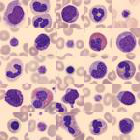

In [7]:
x = bloodmnist.imgs / 255.
x = x.reshape(-1, 2352)
y = pd.Series(bloodmnist.labels.reshape(-1))
y = y.astype('int').map(dict(zip(range(0, 8), info['label'].values())))
bloodmnist.montage(length=5)

### 4a PCA

In [ ]:
## ENTER YOUR CODE HERE ##

### 4b t-SNE

In [ ]:
## ENTER YOUR CODE HERE ##

### 4c UMAP

In [ ]:
## ENTER YOUR CODE HERE ##

Выводы:

*Ваш текст тут*

## Формат результата

Пример графика для одного из пунктов задания:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/Exercises/EX04/result_2_task_ex04.png" width="300">